## SpotiPy-Wrapped
#### By: Patrick D
### Usage Instructions:
1) Request your personal data from Spotify:  spotify.com -> my profile -> privacy -> request personal data -> wait a few days  
2) Unzip files into the input folder within this directory  
3) Change the 'directory' variable to point to your folder  
4) Run the notebook  
5) Change input variables of functions to get more specific information  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import time
import datetime
# Jupyter theming options: 
# from jupyterthemes import jtplot
# jtplot.style()

### Data Cleaning

In [2]:
# Convert json files to pandas dataframe
# directory - the folder directory containing the json files
def read_history(directory):
    his_list = []
    i = 0
    for file in os.scandir(directory):
        if (file.path.endswith('.json') and file.is_file() and 'StreamingHistory' in file.path):
            i = i + 1
            temp = pd.read_json(file.path)
            his_list.append(temp)
    his = pd.concat(his_list)
    print('Files Included:', i, '\n')
    print('Unique Values:')
    print(his.apply(lambda x: x.nunique()))
    return his

In [3]:
# create listening history dataframe from desired directory within input folder
directory = 'input/12-06-21' # change this to '/input/your-directory-name'
his = read_history(directory)

# uncomment this if you want your dataframe output as a csv (change end of directory to your desired one)
# his.to_csv('~/Documents/Python/Spotify-Analysis/input/12-06-21/his.csv', index = False)

his.head(5)

Files Included: 8 

Unique Values:
endTime       53597
artistName     1987
trackName      6462
msPlayed      17700
dtype: int64


,endTime,artistName,trackName,msPlayed
0,2021-03-10 05:52,S N U G,Alaska,178119
1,2021-03-10 05:54,Mondo Loops,Goyo,133541
2,2021-03-10 05:56,Tom Doolie,Mavericks,120386
3,2021-03-10 05:58,G Mills,Drifting,133935
4,2021-03-10 06:02,Jhove,"i know, goodbye",188799


In [4]:
skipped = his[his['msPlayed'] < 30000]
unskipped = his[his['msPlayed'] > 30000]

# This line causes minor error, fix at some point - currently necessary for timeframe functions to work
unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])

tracks = unskipped['trackName'].value_counts()
artists = unskipped['artistName'].value_counts() 
# for relative frequency add 'normalize = True' within value_counts()

skipped_tracks = skipped['trackName'].value_counts()
skipped_artists = skipped['artistName'].value_counts()

<ipython-input-4-8ec7e820e177>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unskipped['endTime'] = pd.to_datetime(unskipped['endTime'])


### Graphs

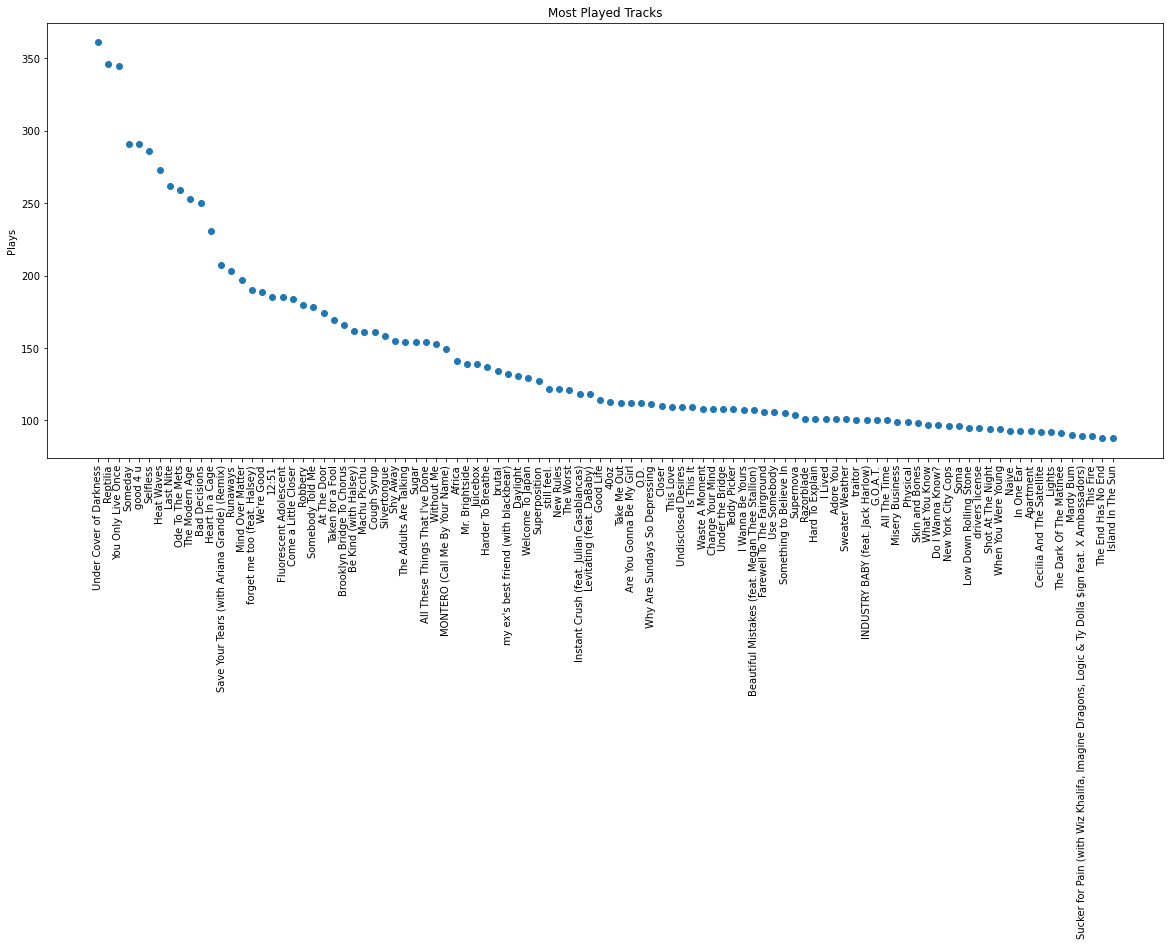

In [5]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

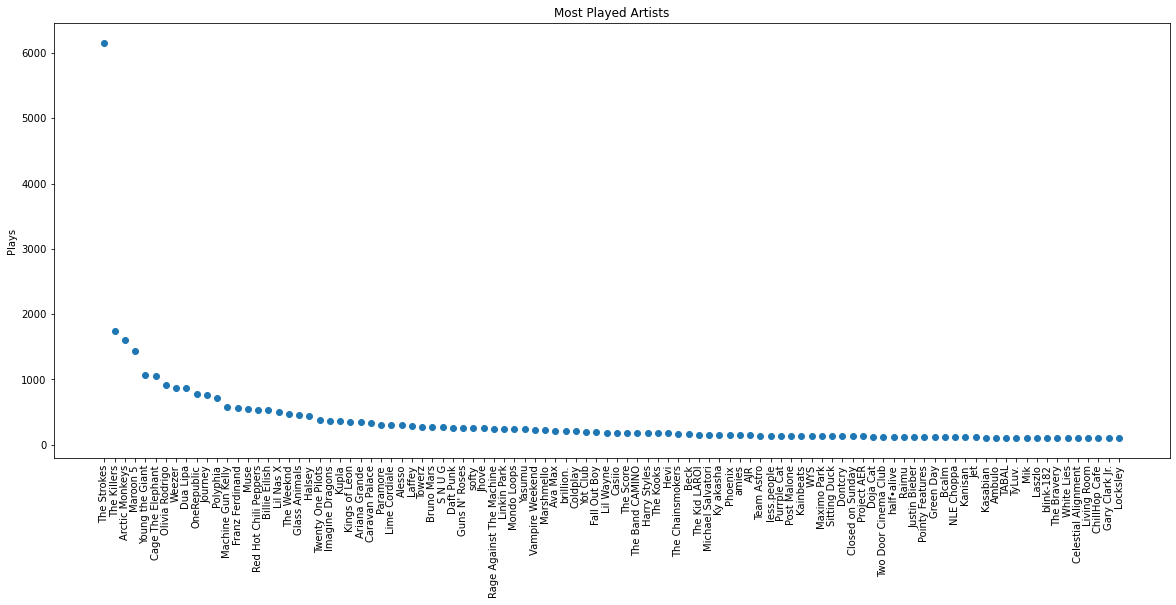

In [6]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Played Artists')
plt.ylabel('Plays')
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = [20, 8]
def plotArtist(artistname, numtracks):
    artistdata = unskipped[unskipped['artistName'] == artistname]
    artistdata = artistdata['trackName'].value_counts()
    plt.plot(artistdata.head(numtracks), 'o')
    plt.xticks(rotation = 90)
    plt.title('Most played songs by ' + artistname)
    plt.ylabel('Plays')
    plt.show()

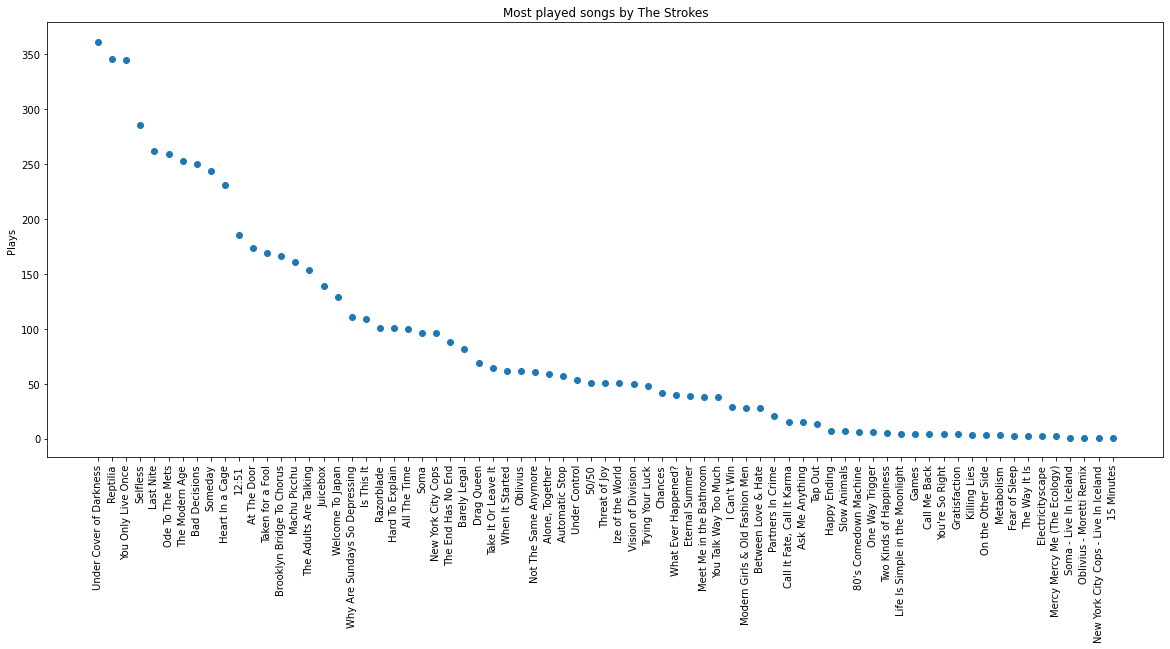

In [8]:
plotArtist("The Strokes", 100)

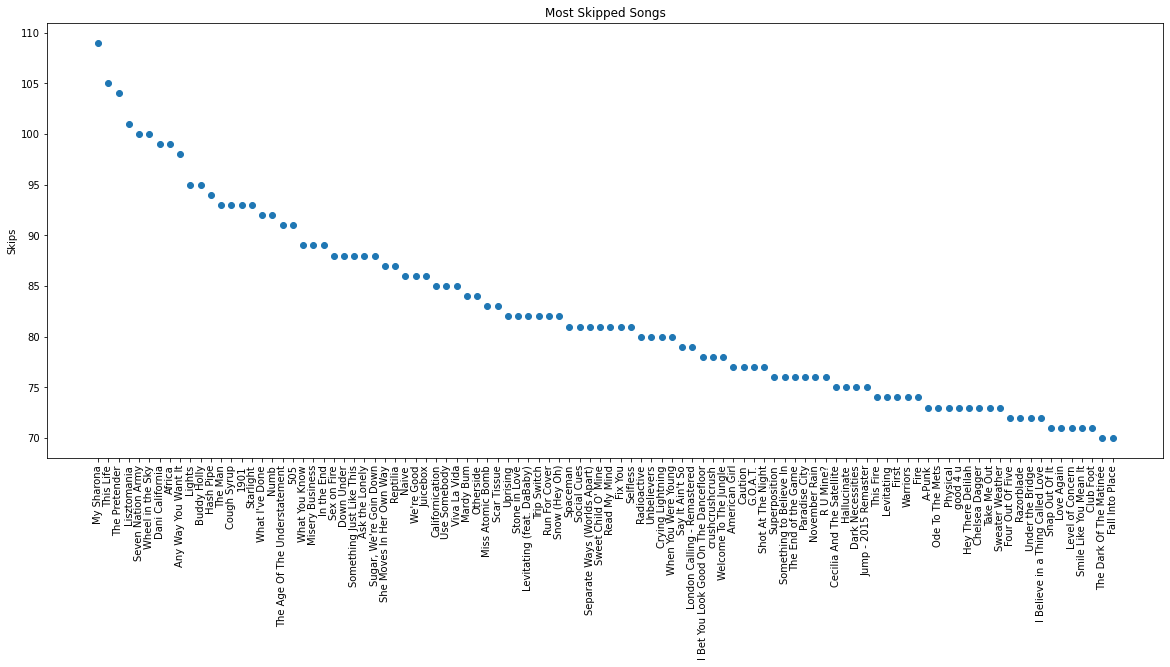

In [9]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_tracks.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Songs')
plt.ylabel('Skips')
plt.show()

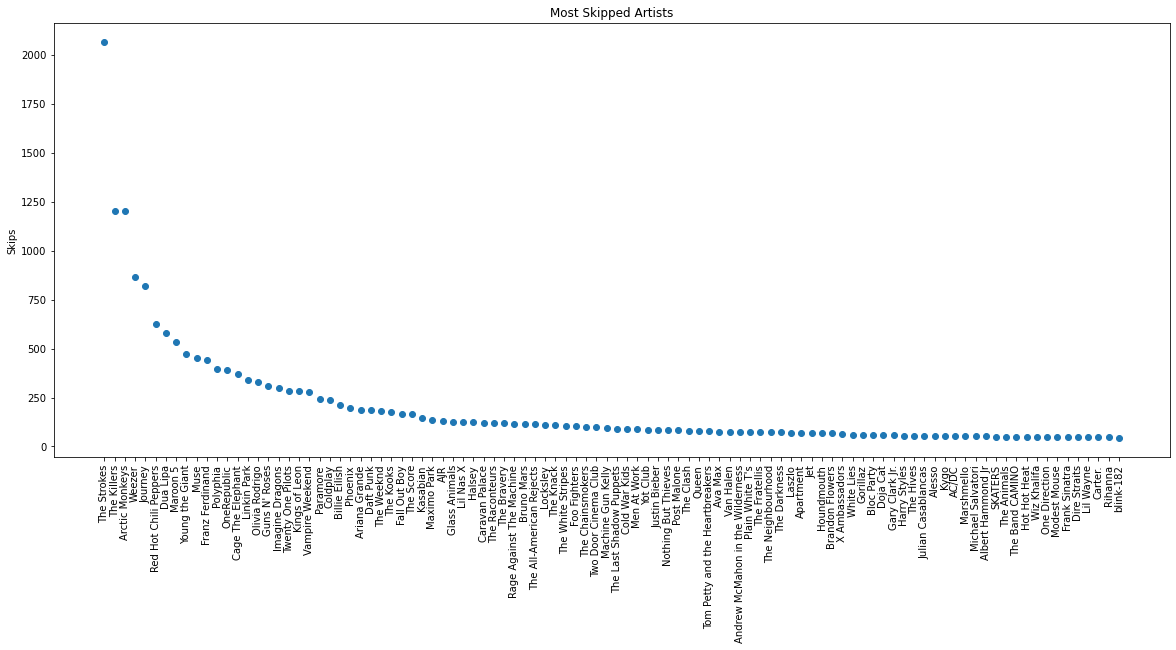

In [10]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.plot(skipped_artists.head(100), 'o')
plt.xticks(rotation = 90)
plt.title('Most Skipped Artists')
plt.ylabel('Skips')
plt.show()

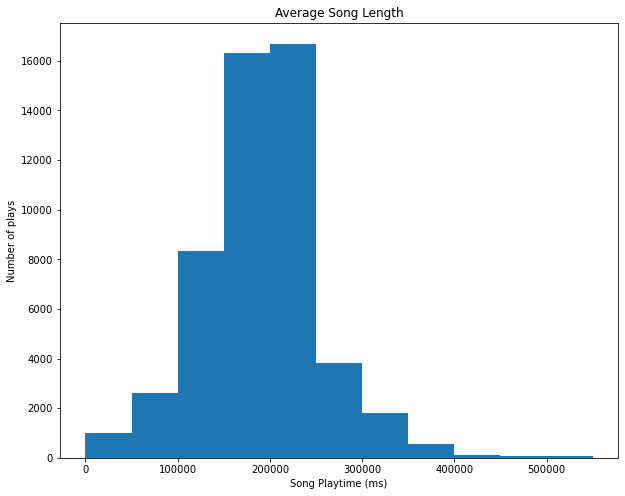

In [11]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.hist(unskipped['msPlayed'], 
         bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000])
plt.xlabel("Song Playtime (ms)")
plt.ylabel("Number of plays")
plt.title("Average Song Length")
plt.show()

### Other Information

In [12]:
# TODO - change to output in the form of 'songPlayCount' function 
def topSongPlays(numsongs):
    int(numsongs)
    print('Your top', numsongs, 'songs: ')
    print('Song                       Plays')
    print(tracks.head(numsongs))    

In [13]:
# change n to find your n top songs
n = 10
topSongPlays(n)

Your top 10 songs: 
Song                       Plays
Under Cover of Darkness    361
Reptilia                   346
You Only Live Once         345
Someday                    291
good 4 u                   291
Selfless                   286
Heat Waves                 273
Last Nite                  262
Ode To The Mets            259
The Modern Age             253
Name: trackName, dtype: int64


In [14]:
# get total playtime
playtime = unskipped['msPlayed'].sum()
playtime = playtime / 60000
playtime = int(playtime)
print("Total minutes listened:", playtime)

Total minutes listened: 173073


### Artist/Song specific information

In [15]:
def artistPlayCount(artistname):
    plays = unskipped[unskipped['artistName'] == artistname]
    plays = plays.apply(lambda x: x.nunique())
    return plays[0]
    
def songPlayCount(trackname):
    plays = unskipped[unskipped['trackName'] == trackname]
    plays = plays.apply(lambda x: x.nunique())
    return plays[0]

In [16]:
artist = 'The Strokes' # change this to an artist of your choice (case sensitive)
temp = artistPlayCount(artist)
print("You have listened to", artist, temp, "times")

You have listened to The Strokes 6145 times


In [17]:
track = "We're Good" # change this to a song name of your choice (case sensitive)
temp = songPlayCount(track)
print("You have listened to", track, temp, "times")

You have listened to We're Good 188 times


### Timeframe specific information

In [18]:
def topSongsTimeframe(timestamp):
    plt.rcParams['figure.figsize'] = [20, 8]
    # convert input into timestamp format
    element = datetime.datetime.strptime(timestamp, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element]
    temp = times['trackName'].value_counts() 
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top Tracks Since ' + timestamp)
    plt.ylabel('Plays')
    plt.show()
    return(temp.head(10))
    
def topSongsTimeframeBounded(lower, upper):
    plt.rcParams['figure.figsize'] = [20, 8]
    element_l = datetime.datetime.strptime(lower, "%Y-%m-%d")
    element_u = datetime.datetime.strptime(upper, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element_l] 
    times = times[times['endTime'] <= element_u]
    temp = times['trackName'].value_counts() 
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top tracks between ' + lower + ' and ' + upper)
    plt.ylabel('Plays')
    plt.show()
    return (temp.head(25))

def topArtistsTimeframe(timestamp):
    plt.rcParams['figure.figsize'] = [20, 8]
    element = datetime.datetime.strptime(timestamp, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element]
    temp = times['artistName'].value_counts()
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top Artists Since ' + timestamp)
    plt.ylabel('Plays')
    plt.show()
    return(temp.head(10))


def topArtistsTimeframeBounded(lower, upper):
    plt.rcParams['figure.figsize'] = [20, 8]
    element_l = datetime.datetime.strptime(lower, "%Y-%m-%d")
    element_u = datetime.datetime.strptime(upper, "%Y-%m-%d")
    times = unskipped[unskipped['endTime'] >= element_l]
    times = times[times['endTime'] <= element_u]
    temp = times['artistName'].value_counts()
    plt.plot(temp.head(100), 'o')
    plt.xticks(rotation = 90)
    plt.title('Top Artists Between ' + lower + ' and ' + upper)
    plt.ylabel('Plays')
    plt.show()
    return(temp.head(10))

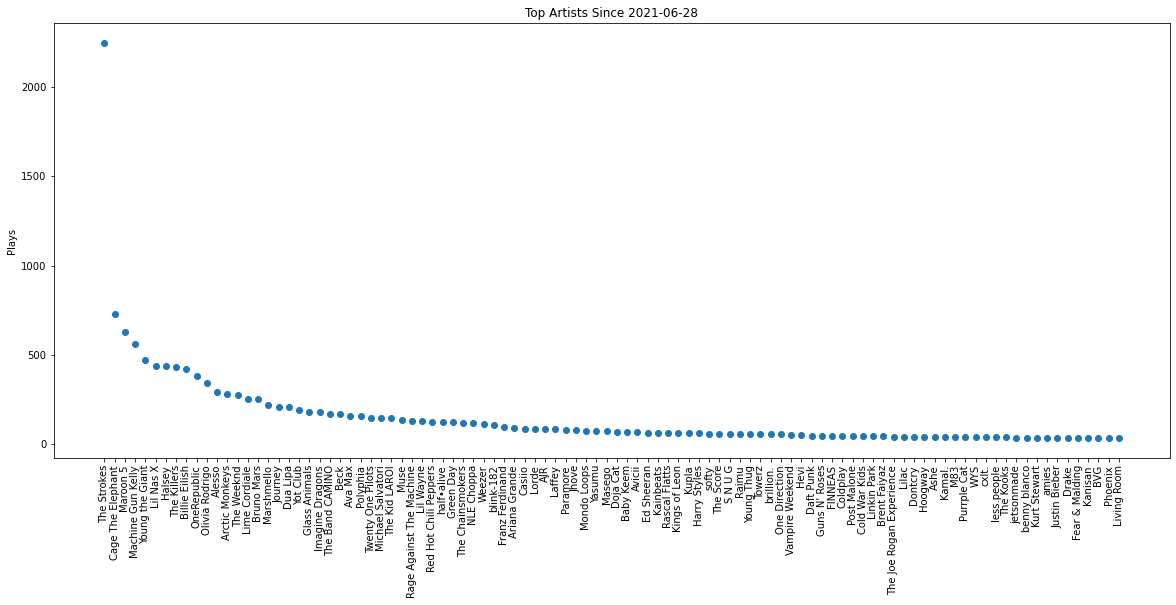

The Strokes          2248
Cage The Elephant     730
Maroon 5              630
Machine Gun Kelly     558
Young the Giant       469
Lil Nas X             436
Halsey                435
The Killers           430
Billie Eilish         418
OneRepublic           379
Name: artistName, dtype: int64

In [19]:
# Plot top artists since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2021-06-28' # change this
topArtistsTimeframe(timeframe)

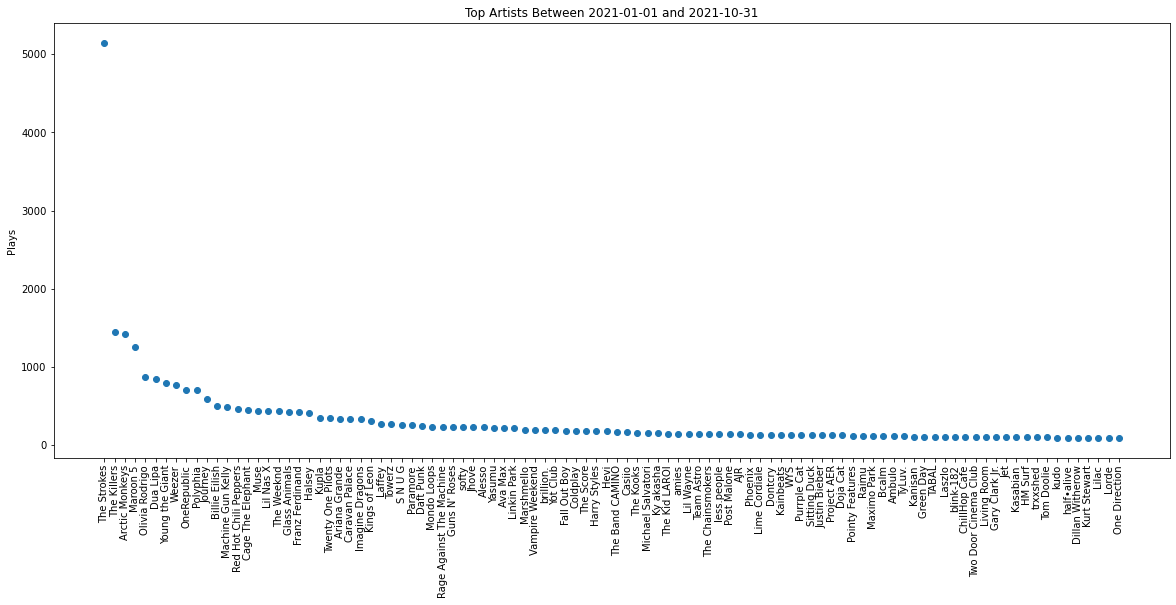

The Strokes        5147
The Killers        1443
Arctic Monkeys     1422
Maroon 5           1256
Olivia Rodrigo      865
Dua Lipa            845
Young the Giant     796
Weezer              763
OneRepublic         707
Polyphia            702
Name: artistName, dtype: int64

In [20]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2021-01-01' # change this - lower bound
timeframe_upper = '2021-10-31' # change this - upper bound
topArtistsTimeframeBounded(timeframe_lower, timeframe_upper)

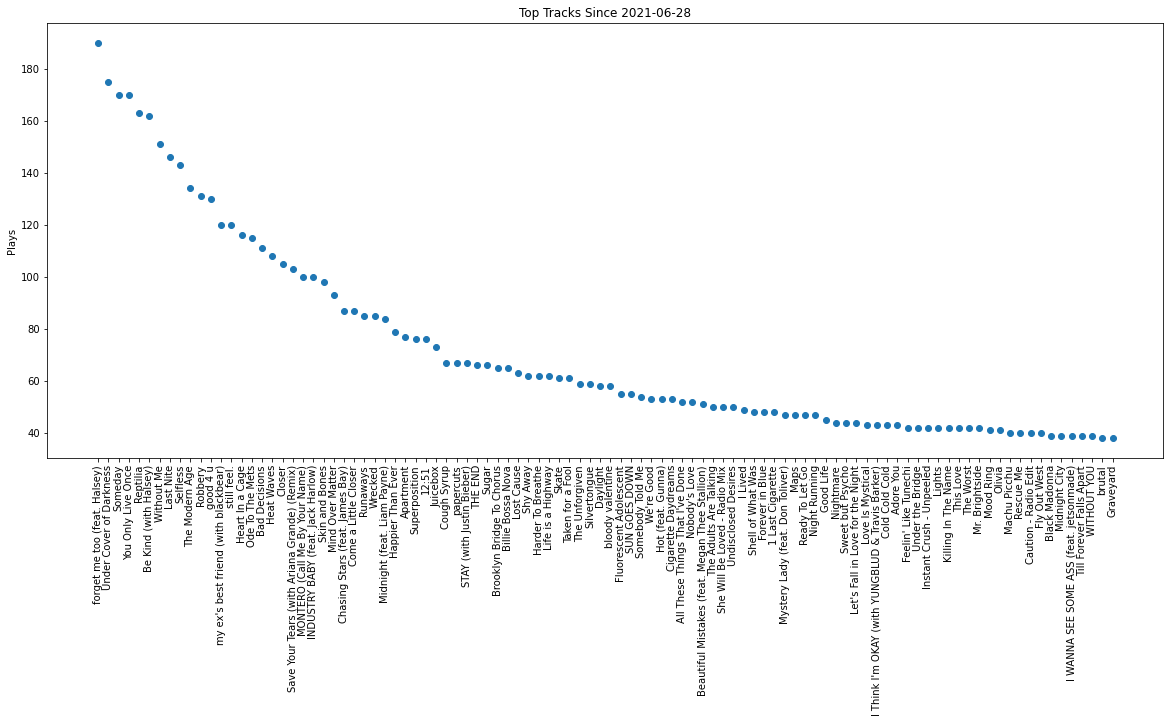

forget me too (feat. Halsey)    190
Under Cover of Darkness         175
Someday                         170
You Only Live Once              170
Reptilia                        163
Be Kind (with Halsey)           162
Without Me                      151
Last Nite                       146
Selfless                        143
The Modern Age                  134
Name: trackName, dtype: int64

In [21]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe = '2021-06-28' # change this
topSongsTimeframe(timeframe)

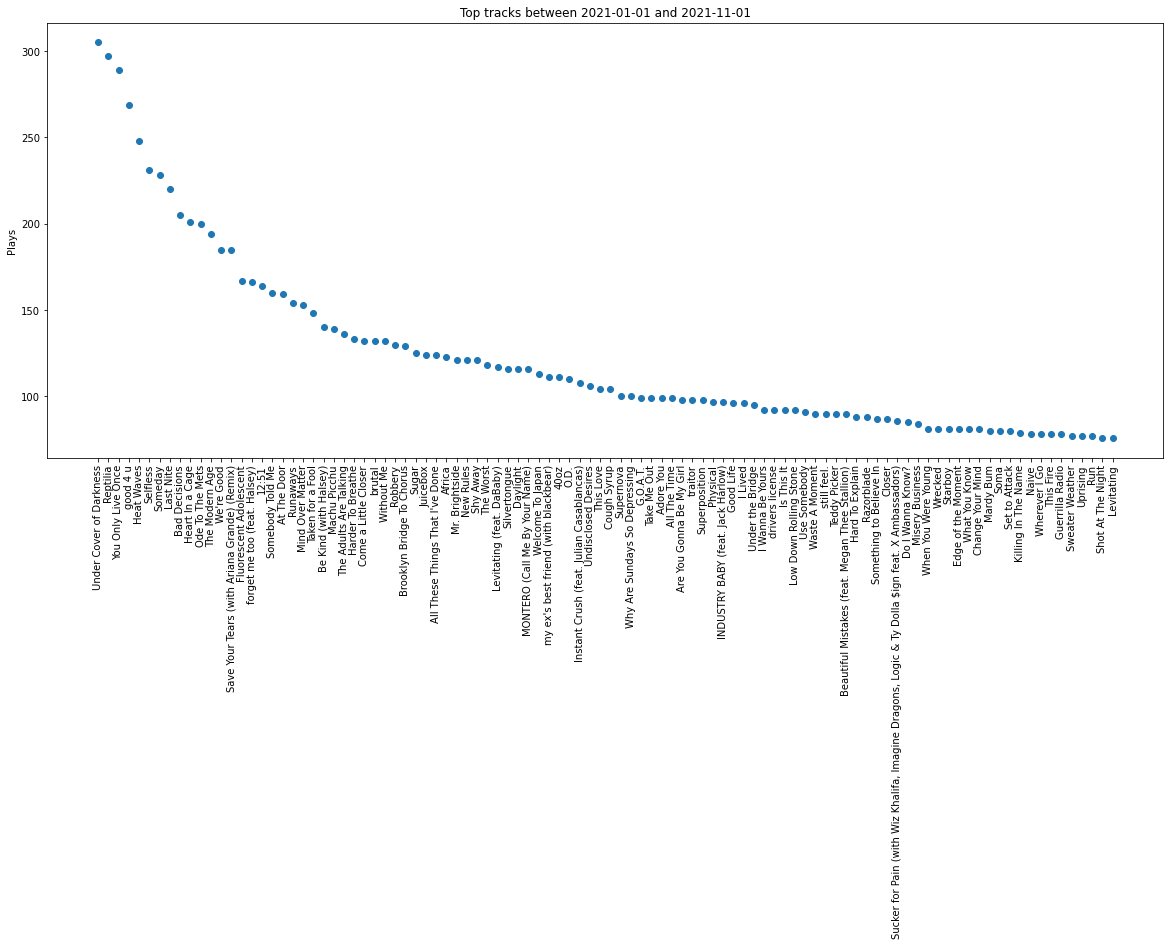

Under Cover of Darkness                         305
Reptilia                                        297
You Only Live Once                              289
good 4 u                                        269
Heat Waves                                      248
Selfless                                        231
Someday                                         228
Last Nite                                       220
Bad Decisions                                   205
Heart In a Cage                                 201
Ode To The Mets                                 200
The Modern Age                                  194
We're Good                                      185
Save Your Tears (with Ariana Grande) (Remix)    185
Fluorescent Adolescent                          167
forget me too (feat. Halsey)                    166
12:51                                           164
Somebody Told Me                                160
At The Door                                     159
Runaways    

In [22]:
# Plot top songs since input date
# format: 'year-month-day'
#         'xxxx-xx-xx'
timeframe_lower = '2021-01-01' # change this - lower bound
timeframe_upper = '2021-11-01' # change this - upper bound
topSongsTimeframeBounded(timeframe_lower, timeframe_upper)

In [23]:
# to match 2021 wrapped
# Wrapped (allegedly) uses timeframe 01-01 to 10-31 of a year but *can go later
# top artists:
# The Strokes, killers, arctic monkeys, maroon 5, Olivia Rodrigo
# Top 5 songs:
# Under cover of darkness, reptilia, yolo, good 4 u, heat waves
# top 10 songs:
# Save your tears(with ariana grande), selfless, we're good, fluorescent adoloescent, forget me too (feat. halsey)
# listening time: 156528 min
4.99/((156528 / 60)/ 12) # cost per hour listened

0.022953081876724932

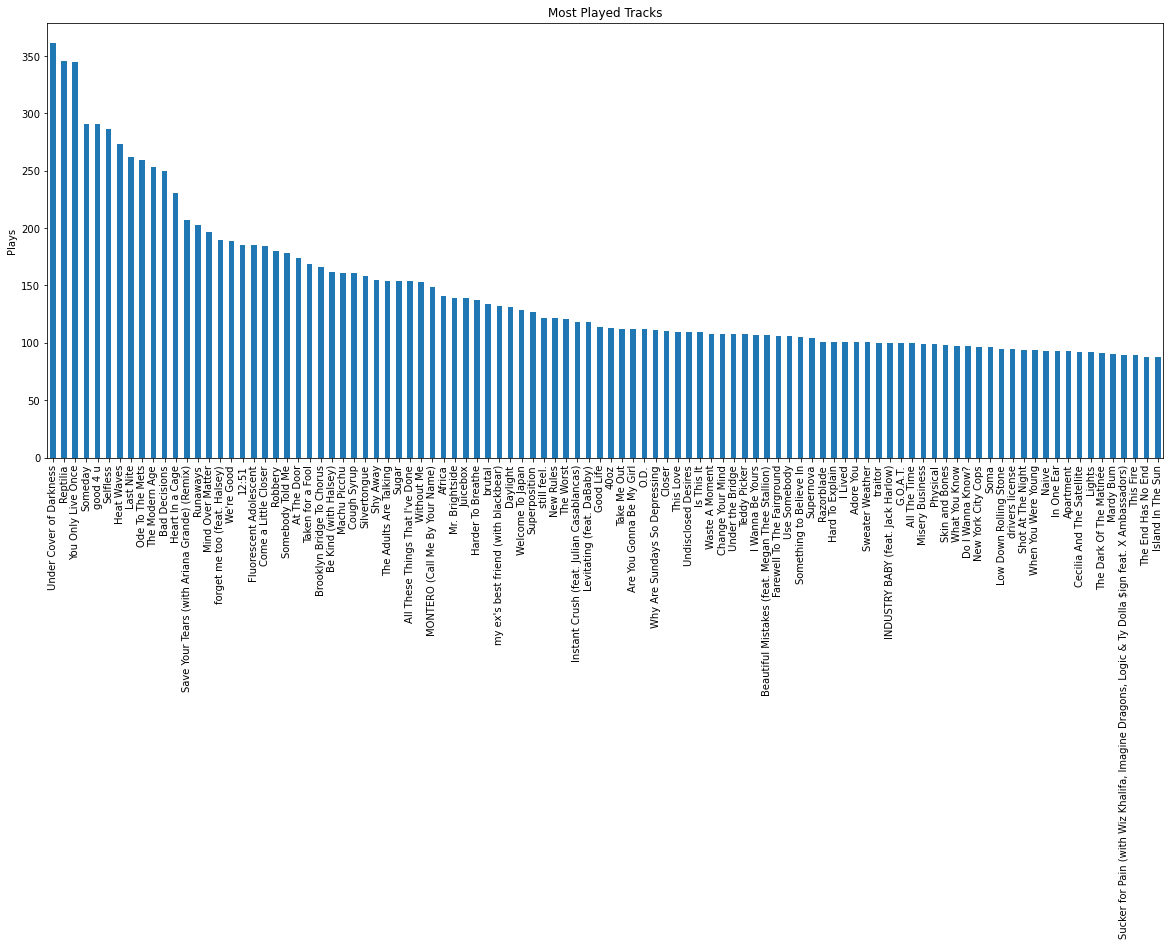

In [24]:
# WIP - change plots to bar plots
tracks.head(100).plot(kind = 'bar');
plt.title('Most Played Tracks')
plt.ylabel('Plays')
plt.show()

In [25]:
# find listening time for a given month
# WIP - fix end of month bounds
def listeningTimeMonth(month_num, year):
    # define bounds for month
    lower = str(year) + "-" + str(month_num) + "-01"
    element_l = datetime.datetime.strptime(lower, "%Y-%m-%d")
    upper = str(year) + "-" + str(month_num) + "-31"
    element_u = datetime.datetime.strptime(upper, "%Y-%m-%d")
    
    # narrow data to fit parameters
    df_params = unskipped[unskipped['endTime'] >= element_l]
    df_params = df_params[df_params['endTime'] <= element_u]
    total = df_params['msPlayed'].sum()
    #calculate hours listened
    total = total / 1000 / 60 / 60
    
    return(total)

In [26]:
# Get listening time for a given month
# inputs - month number and year
month = 7
year = 2021
listeningTimeMonth(month, year)

234.46213972222222

In [31]:
def listeningTimeArtist(artist):
    df_params = unskipped[unskipped['artistName'] == artist]
    return(df_params['msPlayed'].sum() / 1000 / 60 / 60)

In [32]:
# Get listening time for a given artist in hours
# Change artist name
artist = 'The Strokes'
listeningTimeArtist(artist)

364.88180833333337